# Python for Algorithmic Trading #

In this notebook we cover some basic techniques in algorithmic trading. 

***

## Libraries ## 

First we must import some required libraries.

In [1]:
import yfinance as yf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

***
## Downloading Data ##

We now import some stock data using the yfinance API. 

In [2]:
tickers = ["AAPL", "MSFT", "TSLA", "SPY"]
stocks = yf.download(tickers, start = "2020-01-01")

[*********************100%***********************]  4 of 4 completed


We can save the data as a cvs file like so:

In [3]:
stocks.to_csv("StocksAlgoTrading.csv")

***
## Reading and Writing Data

Given a csv, we can load it back in using the pandas module: 

In [4]:
stocks = pd.read_csv("StocksAlgoTrading.csv", header=[0,1])
stocks

Unnamed: 0_level_0   Adj Close                                      \
    Unnamed: 0_level_1        AAPL        MSFT         SPY        TSLA   
0                 Date         NaN         NaN         NaN         NaN   
1           2020-01-02   73.561531  156.151947  309.694946   28.684000   
2           2020-01-03   72.846367  154.207565  307.349854   29.534000   
3           2020-01-06   73.426834  154.606201  308.522400   30.102667   
4           2020-01-07   73.081490  153.196503  307.654907   31.270666   
..                 ...         ...         ...         ...         ...   
773         2023-01-26  143.960007  248.000000  404.750000  160.270004   
774         2023-01-27  145.929993  248.160004  405.679993  177.899994   
775         2023-01-30  143.000000  242.710007  400.589996  166.660004   
776         2023-01-31  144.289993  247.809998  406.480011  173.220001   
777         2023-02-01         NaN  247.089996         NaN         NaN   

          Close                                            High  ...  \
           AAPL        MSFT         SPY        TSLA        AAPL  ...   
0           NaN         NaN         NaN         NaN         NaN  ...   
1     75.087502  160.619995  324.869995   28.684000   75.150002  ...   
2     74.357498  158.619995  322.410004   29.534000   75.144997  ...   
3     74.949997  159.029999  323.640015   30.102667   74.989998  ...   
4     74.597504  157.580002  322.730011   31.270666   75.224998  ...   
..          ...         ...         ...         ...         ...  ...   
773  143.960007  248.000000  404.750000  160.270004  144.250000  ...   
774  145.929993  248.160004  405.679993  177.899994  147.229996  ...   
775  143.000000  242.710007  400.589996  166.660004  145.550003  ...   
776  144.289993  247.809998  406.480011  173.220001  144.339996  ...   
777         NaN  247.089996         NaN         NaN         NaN  ...   

            Low                    Open                                      \
            SPY        TSLA        AAPL        MSFT         SPY        TSLA   
0           NaN         NaN         NaN         NaN         NaN         NaN   
1    322.529999   28.114000   74.059998  158.779999  323.540009   28.299999   
2    321.100006   29.128000   74.287498  158.320007  321.160004   29.366667   
3    320.359985   29.333332   73.447502  157.080002  320.489990   29.364668   
4    322.239990   30.224001   74.959999  159.320007  323.019989   30.760000   
..          ...         ...         ...         ...         ...         ...   
773  400.029999  154.759995  143.169998  243.649994  403.130005  159.970001   
774  403.440002  161.169998  143.160004  248.990005  403.660004  162.429993   
775  400.279999  166.500000  144.960007  244.509995  402.799988  178.050003   
776  400.769989  162.779999  142.699997  243.449997  401.130005  164.570007   
777         NaN         NaN         NaN  248.000000         NaN         NaN   

          Volume                                       
            AAPL        MSFT         SPY         TSLA  
0            NaN         NaN         NaN          NaN  
1    135480400.0  22622100.0  59151200.0  142981500.0  
2    146322800.0  21116200.0  77709700.0  266677500.0  
3    118387200.0  20813700.0  55653900.0  151995000.0  
4    108872000.0  21634100.0  40496400.0  268231500.0  
..           ...         ...         ...          ...  
773   54105100.0  33454500.0  72287400.0  234815100.0  
774   70492800.0  26480800.0  68280700.0  305632100.0  
775   64015300.0  25867400.0  74202000.0  230878800.0  
776   65798500.0  26525300.0  86643400.0  196450300.0  
777          NaN   8341404.0         NaN          NaN  

[778 rows x 25 columns]

We can format the dataframe using the various inputs in the read_csv method:

In [5]:
stocks = pd.read_csv("StocksAlgoTrading.csv", header=[0,1], index_col=[0], parse_dates=[0])
stocks

Adj Close                                           Close  \
                  AAPL        MSFT         SPY        TSLA        AAPL   
Date                                                                     
2020-01-02   73.561531  156.151947  309.694946   28.684000   75.087502   
2020-01-03   72.846367  154.207565  307.349854   29.534000   74.357498   
2020-01-06   73.426834  154.606201  308.522400   30.102667   74.949997   
2020-01-07   73.081490  153.196503  307.654907   31.270666   74.597504   
2020-01-08   74.257095  155.636688  309.294556   32.809334   75.797501   
...                ...         ...         ...         ...         ...   
2023-01-26  143.960007  248.000000  404.750000  160.270004  143.960007   
2023-01-27  145.929993  248.160004  405.679993  177.899994  145.929993   
2023-01-30  143.000000  242.710007  400.589996  166.660004  143.000000   
2023-01-31  144.289993  247.809998  406.480011  173.220001  144.289993   
2023-02-01         NaN  247.089996         NaN         NaN         NaN   

                                                      High              ...  \
                  MSFT         SPY        TSLA        AAPL        MSFT  ...   
Date                                                                    ...   
2020-01-02  160.619995  324.869995   28.684000   75.150002  160.729996  ...   
2020-01-03  158.619995  322.410004   29.534000   75.144997  159.949997  ...   
2020-01-06  159.029999  323.640015   30.102667   74.989998  159.100006  ...   
2020-01-07  157.580002  322.730011   31.270666   75.224998  159.669998  ...   
2020-01-08  160.089996  324.450012   32.809334   76.110001  160.800003  ...   
...                ...         ...         ...         ...         ...  ...   
2023-01-26  248.000000  404.750000  160.270004  144.250000  248.309998  ...   
2023-01-27  248.160004  405.679993  177.899994  147.229996  249.830002  ...   
2023-01-30  242.710007  400.589996  166.660004  145.550003  245.600006  ...   
2023-01-31  247.809998  406.480011  173.220001  144.339996  247.949997  ...   
2023-02-01  247.089996         NaN         NaN         NaN  248.449905  ...   

                   Low                    Open                          \
                   SPY        TSLA        AAPL        MSFT         SPY   
Date                                                                     
2020-01-02  322.529999   28.114000   74.059998  158.779999  323.540009   
2020-01-03  321.100006   29.128000   74.287498  158.320007  321.160004   
2020-01-06  320.359985   29.333332   73.447502  157.080002  320.489990   
2020-01-07  322.239990   30.224001   74.959999  159.320007  323.019989   
2020-01-08  322.670013   31.215334   74.290001  158.929993  322.940002   
...                ...         ...         ...         ...         ...   
2023-01-26  400.029999  154.759995  143.169998  243.649994  403.130005   
2023-01-27  403.440002  161.169998  143.160004  248.990005  403.660004   
2023-01-30  400.279999  166.500000  144.960007  244.509995  402.799988   
2023-01-31  400.769989  162.779999  142.699997  243.449997  401.130005   
2023-02-01         NaN         NaN         NaN  248.000000         NaN   

                             Volume                                     
                  TSLA         AAPL      MSFT         SPY         TSLA  
Date                                                                    
2020-01-02   28.299999  135480400.0  22622100  59151200.0  142981500.0  
2020-01-03   29.366667  146322800.0  21116200  77709700.0  266677500.0  
2020-01-06   29.364668  118387200.0  20813700  55653900.0  151995000.0  
2020-01-07   30.760000  108872000.0  21634100  40496400.0  268231500.0  
2020-01-08   31.580000  132079200.0  27746500  68296000.0  467164500.0  
...                ...          ...       ...         ...          ...  
2023-01-26  159.970001   54105100.0  33454500  72287400.0  234815100.0  
2023-01-27  162.429993   70492800.0  26480800  68280700.0  305632100.0  
2023-01-30  178.050003   6401

We can convert the multi-index columns into a single index by using the following:

In [6]:
# convert mult index to one tuple
stocks.columns=stocks.columns.to_flat_index()
stocks.columns

Index([('Adj Close', 'AAPL'), ('Adj Close', 'MSFT'),  ('Adj Close', 'SPY'),
       ('Adj Close', 'TSLA'),     ('Close', 'AAPL'),     ('Close', 'MSFT'),
            ('Close', 'SPY'),     ('Close', 'TSLA'),      ('High', 'AAPL'),
            ('High', 'MSFT'),       ('High', 'SPY'),      ('High', 'TSLA'),
             ('Low', 'AAPL'),       ('Low', 'MSFT'),        ('Low', 'SPY'),
             ('Low', 'TSLA'),      ('Open', 'AAPL'),      ('Open', 'MSFT'),
             ('Open', 'SPY'),      ('Open', 'TSLA'),    ('Volume', 'AAPL'),
          ('Volume', 'MSFT'),     ('Volume', 'SPY'),    ('Volume', 'TSLA')],
      dtype='object')

Now the stocks dataframe has a different format:

In [7]:
stocks

,"(Adj Close, AAPL)","(Adj Close, MSFT)","(Adj Close, SPY)","(Adj Close, TSLA)","(Close, AAPL)","(Close, MSFT)","(Close, SPY)","(Close, TSLA)","(High, AAPL)","(High, MSFT)",...,"(Low, SPY)","(Low, TSLA)","(Open, AAPL)","(Open, MSFT)","(Open, SPY)","(Open, TSLA)","(Volume, AAPL)","(Volume, MSFT)","(Volume, SPY)","(Volume, TSLA)"
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,73.561531,156.151947,309.694946,28.684000,75.087502,160.619995,324.869995,28.684000,75.150002,160.729996,...,322.529999,28.114000,74.059998,158.779999,323.540009,28.299999,135480400.0,22622100,59151200.0,142981500.0
2020-01-03,72.846367,154.207565,307.349854,29.534000,74.357498,158.619995,322.410004,29.534000,75.144997,159.949997,...,321.100006,29.128000,74.287498,158.320007,321.160004,29.366667,146322800.0,21116200,77709700.0,266677500.0
2020-01-06,73.426834,154.606201,308.522400,30.102667,74.949997,159.029999,323.640015,30.102667,74.989998,159.100006,...,320.359985,29.333332,73.447502,157.080002,320.489990,29.364668,118387200.0,20813700,55653900.0,151995000.0
2020-01-07,73.081490,153.196503,307.654907,31.270666,74.597504,157.580002,322.730011,31.270666,75.224998,159.669998,...,322.239990,30.224001,74.959999,159.320007,323.019989,30.760000,108872000.0,21634100,40496400.0,268231500.0
2020-01-08,74.257095,155.636688,309.294556,32.809334,75.797501,160.089996,324.450012,32.809334,76.110001,160.800003,...,322.670013,31.215334,74.290001,158.929993,322.940002,31.580000,132079200.0,27746500,68296000.0,467164500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-26,143.960007,248.000000,404.750000,160.270004,143.960007,248.000000,404.750000,160.270004,144.250000,248.309998,...,400.029999,154.759995,143.169998,243.649994,403.130005,159.970001,54105100.0,33454500,72287400.0,234815100.0
2023-01-27,145.929993,248.160004,405.679993,177.899994,145.929993,248.160004,405.679993,177.899994,147.229996,249.830002,...,403.440002,161.169998,143.160004,248.990005,403.660004,162.429993,70492800.0,26480800,68280700.0,305632100.0
2023-01-30,143.000000,242.710007,400.589996,166.660004,143.000000,242.710007,400.589996,166.660004,145.550003,245.600006,...,400.279999,166.500000,144.960007,244.509995,402.799988,178.050003,64015300.0,25867400,74202000.0,230878800.0


We can return the data to multi-index using:

In [8]:
stocks.columns = pd.MultiIndex.from_tuples(stocks.columns)
stocks

Adj Close                                           Close  \
                  AAPL        MSFT         SPY        TSLA        AAPL   
Date                                                                     
2020-01-02   73.561531  156.151947  309.694946   28.684000   75.087502   
2020-01-03   72.846367  154.207565  307.349854   29.534000   74.357498   
2020-01-06   73.426834  154.606201  308.522400   30.102667   74.949997   
2020-01-07   73.081490  153.196503  307.654907   31.270666   74.597504   
2020-01-08   74.257095  155.636688  309.294556   32.809334   75.797501   
...                ...         ...         ...         ...         ...   
2023-01-26  143.960007  248.000000  404.750000  160.270004  143.960007   
2023-01-27  145.929993  248.160004  405.679993  177.899994  145.929993   
2023-01-30  143.000000  242.710007  400.589996  166.660004  143.000000   
2023-01-31  144.289993  247.809998  406.480011  173.220001  144.289993   
2023-02-01         NaN  247.089996         NaN         NaN         NaN   

                                                      High              ...  \
                  MSFT         SPY        TSLA        AAPL        MSFT  ...   
Date                                                                    ...   
2020-01-02  160.619995  324.869995   28.684000   75.150002  160.729996  ...   
2020-01-03  158.619995  322.410004   29.534000   75.144997  159.949997  ...   
2020-01-06  159.029999  323.640015   30.102667   74.989998  159.100006  ...   
2020-01-07  157.580002  322.730011   31.270666   75.224998  159.669998  ...   
2020-01-08  160.089996  324.450012   32.809334   76.110001  160.800003  ...   
...                ...         ...         ...         ...         ...  ...   
2023-01-26  248.000000  404.750000  160.270004  144.250000  248.309998  ...   
2023-01-27  248.160004  405.679993  177.899994  147.229996  249.830002  ...   
2023-01-30  242.710007  400.589996  166.660004  145.550003  245.600006  ...   
2023-01-31  247.809998  406.480011  173.220001  144.339996  247.949997  ...   
2023-02-01  247.089996         NaN         NaN         NaN  248.449905  ...   

                   Low                    Open                          \
                   SPY        TSLA        AAPL        MSFT         SPY   
Date                                                                     
2020-01-02  322.529999   28.114000   74.059998  158.779999  323.540009   
2020-01-03  321.100006   29.128000   74.287498  158.320007  321.160004   
2020-01-06  320.359985   29.333332   73.447502  157.080002  320.489990   
2020-01-07  322.239990   30.224001   74.959999  159.320007  323.019989   
2020-01-08  322.670013   31.215334   74.290001  158.929993  322.940002   
...                ...         ...         ...         ...         ...   
2023-01-26  400.029999  154.759995  143.169998  243.649994  403.130005   
2023-01-27  403.440002  161.169998  143.160004  248.990005  403.660004   
2023-01-30  400.279999  166.500000  144.960007  244.509995  402.799988   
2023-01-31  400.769989  162.779999  142.699997  243.449997  401.130005   
2023-02-01         NaN         NaN         NaN  248.000000         NaN   

                             Volume                                     
                  TSLA         AAPL      MSFT         SPY         TSLA  
Date                                                                    
2020-01-02   28.299999  135480400.0  22622100  59151200.0  142981500.0  
2020-01-03   29.366667  146322800.0  21116200  77709700.0  266677500.0  
2020-01-06   29.364668  118387200.0  20813700  55653900.0  151995000.0  
2020-01-07   30.760000  108872000.0  21634100  40496400.0  268231500.0  
2020-01-08   31.580000  132079200.0  27746500  68296000.0  467164500.0  
...                ...          ...       ...         ...          ...  
2023-01-26  159.970001   54105100.0  33454500  72287400.0  234815100.0  
2023-01-27  162.429993   70492800.0  26480800  68280700.0  305632100.0  
2023-01-30  178.050003   6401

We can extract a lot of useful info using the `describe` function:

In [9]:
stocks.describe()

Adj Close                                           Close              \
             AAPL        MSFT         SPY        TSLA        AAPL        MSFT   
count  776.000000  777.000000  776.000000  776.000000  776.000000  777.000000   
mean   129.453740  242.643828  377.001268  204.505463  130.452719  245.641673   
std     30.450459   47.501245   55.926074   95.358918   30.199842   46.969032   
min     55.082981  132.012512  213.785492   24.081333   56.092499  135.419998   
25%    114.853277  208.873703  331.235359  136.132504  116.247499  213.020004   
50%    134.904205  242.580002  385.962631  221.950005  135.360001  244.520004   
75%    149.887604  280.375092  422.774742  274.947502  150.250000  282.510010   
max    180.959747  339.924805  470.083710  409.970001  182.009995  343.109985   

                                     High              ...         Low  \
              SPY        TSLA        AAPL        MSFT  ...         SPY   
count  776.000000  776.000000  776.000000  777.000000  ...  776.000000   
mean   385.601109  204.505463  132.031402  248.328893  ...  382.583196   
std     54.243670   95.358918   30.467677   47.087962  ...   54.501562   
min    222.949997   24.081333   57.125000  140.570007  ...  218.259995   
25%    342.872513  136.132504  117.960001  215.229996  ...  340.384995   
50%    391.629990  221.950005  137.180000  246.410004  ...  388.975006   
75%    429.080002  274.947502  151.570007  286.769989  ...  425.867493   
max    477.709991  409.970001  182.940002  349.670013  ...  476.059998   

                         Open                                      \
             TSLA        AAPL        MSFT         SPY        TSLA   
count  776.000000  776.000000  777.000000  776.000000  776.000000   
mean   199.344887  130.358132  245.557413  385.547564  204.680722   
std     93.254146   30.223252   47.057641   54.278462   95.584356   
min     23.367332   57.020000  137.009995  228.190002   24.980000   
25%    133.417503  116.525000  213.490005  342.932495  136.315502   
50%    216.715004  135.654999  244.270004  391.574997  222.686668   
75%    267.952492  149.960003  283.019989  428.969994  276.856667   
max    405.666656  182.630005  344.619995  479.220001  411.470001   

             Volume                                            
               AAPL          MSFT           SPY          TSLA  
count  7.760000e+02  7.770000e+02  7.760000e+02  7.760000e+02  
mean   1.110627e+08  3.165196e+07  8.936429e+07  1.334826e+08  
std    5.569928e+07  1.349767e+07  4.758685e+07  9.950076e+07  
min    3.519590e+07  8.341404e+06  2.645790e+07  2.940180e+07  
25%    7.570122e+07  2.286070e+07  5.951610e+07  6.969322e+07  
50%    9.416770e+07  2.837280e+07  7.719745e+07  9.610005e+07  
75%    1.272202e+08  3.556040e+07  1.040192e+08  1.690470e+08  
max    4.265100e+08  9.701270e+07  3.922207e+08  9.140820e+08  

[8 rows x 24 columns]

***
## Plotting and Visualization ## 

We can plot closing values of our stocks. First we make a new object which stores the closing values for each stock.

In [10]:
close = stocks.loc[:,"Close"].copy()
close

,AAPL,MSFT,SPY,TSLA
Date,,,,
2020-01-02,75.087502,160.619995,324.869995,28.684000
2020-01-03,74.357498,158.619995,322.410004,29.534000
2020-01-06,74.949997,159.029999,323.640015,30.102667
2020-01-07,74.597504,157.580002,322.730011,31.270666
2020-01-08,75.797501,160.089996,324.450012,32.809334
...,...,...,...,...
2023-01-26,143.960007,248.000000,404.750000,160.270004
2023-01-27,145.929993,248.160004,405.679993,177.899994
2023-01-30,143.000000,242.710007,400.589996,166.660004


Set the style of the plot to seaborn.

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn")

/tmp/ipykernel_8505/715908909.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


Now we can produce a plot of historic closing prices:

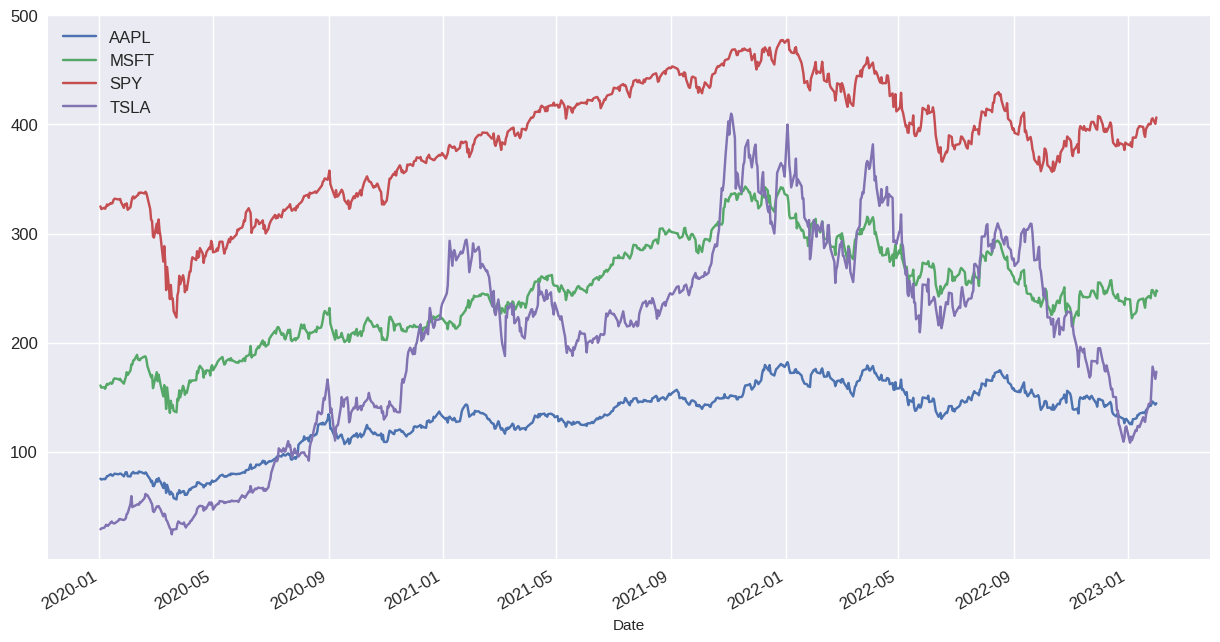

In [14]:
close.plot(figsize=(15,8), fontsize=12)
plt.legend(fontsize=12)
plt.show()

We can normalize the stock prices using the `.div` method, by dividing all the prices by the first closing price, and then multiplying by 100. This way, all of the stocks will start at 100, so they can easily be compared. 

In [15]:
norm_close = close.div(close.iloc[0]).mul(100)

Now we plot the normalized closing prices:

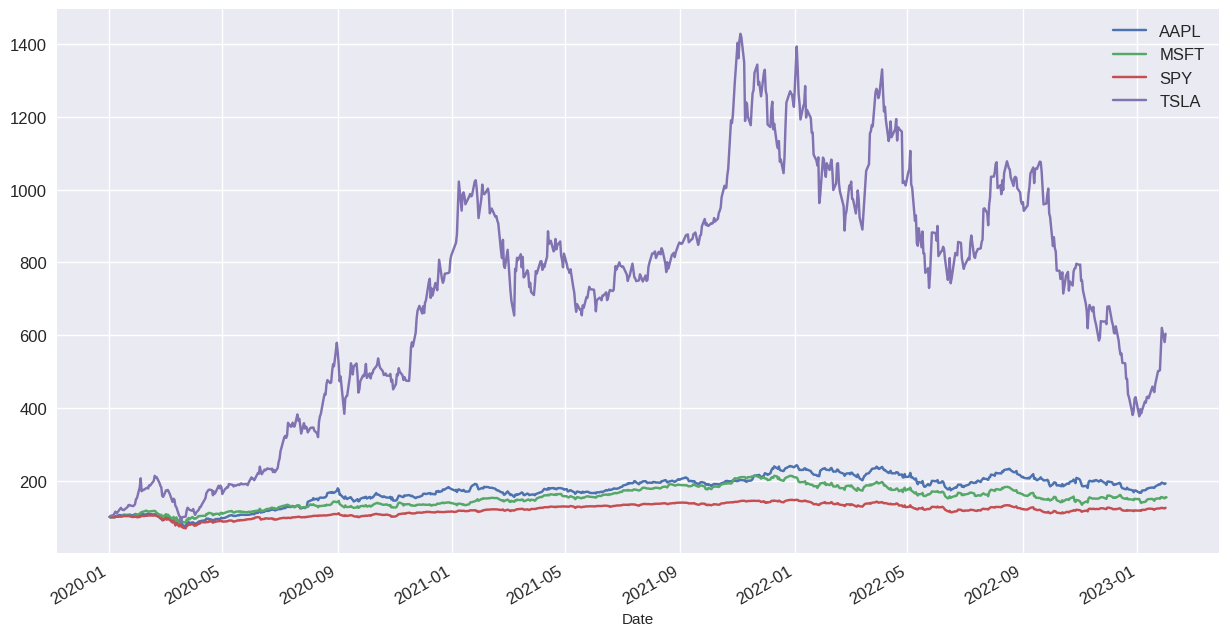

In [16]:
norm_close.plot(figsize=(15,8), fontsize=12)
plt.legend(fontsize=12)
plt.show()

***
## Focusing on a Single Stock

We now focus on a single stock returns. We will focus on apple for this example. We will see some very useful database methods for manipulating the features and computing daily/monthly/yearly returns. 

In [22]:
aapl = close.AAPL.copy().to_frame()

## .to_frame() returns the data as a pandas dataframe
aapl

,AAPL
Date,
2020-01-02,75.087502
2020-01-03,74.357498
2020-01-06,74.949997
2020-01-07,74.597504
2020-01-08,75.797501
...,...
2023-01-26,143.960007
2023-01-27,145.929993
2023-01-30,143.000000


To compute daily return changes, we can use of the `shift` method to move the datapoints and add them to a new column:

In [23]:
# create new column with datapoints shifted one day along
aapl["lag1"] = aapl.shift(periods=1)

# create new column with the differences between the daily closing prices using the .sub method
aapl["Diff"] = aapl.AAPL.sub(aapl.lag1)

# create new column with the percent daily returns
aapl["% Change"] = aapl.AAPL.div(aapl.lag1).sub(1).mul(100)

# view new dataframe
aapl

,AAPL,lag1,Diff,% Change
Date,,,,
2020-01-02,75.087502,NaN,NaN,NaN
2020-01-03,74.357498,75.087502,-0.730003,-0.972204
2020-01-06,74.949997,74.357498,0.592499,0.796825
2020-01-07,74.597504,74.949997,-0.352493,-0.470305
2020-01-08,75.797501,74.597504,1.199997,1.608629
...,...,...,...,...
2023-01-26,143.960007,141.860001,2.100006,1.480337
2023-01-27,145.929993,143.960007,1.969986,1.368426
2023-01-30,143.000000,145.929993,-2.929993,-2.007807


Instead of `shift` and `sub` methods, we can also use the `diff` method to do it in one go:

In [24]:
aapl["Diff2"] = aapl.AAPL.diff(periods=1)

## compare Diff with Diff2
aapl

,AAPL,lag1,Diff,% Change,Diff2
Date,,,,,
2020-01-02,75.087502,NaN,NaN,NaN,NaN
2020-01-03,74.357498,75.087502,-0.730003,-0.972204,-0.730003
2020-01-06,74.949997,74.357498,0.592499,0.796825,0.592499
2020-01-07,74.597504,74.949997,-0.352493,-0.470305,-0.352493
2020-01-08,75.797501,74.597504,1.199997,1.608629,1.199997
...,...,...,...,...,...
2023-01-26,143.960007,141.860001,2.100006,1.480337,2.100006
2023-01-27,145.929993,143.960007,1.969986,1.368426,1.969986
2023-01-30,143.000000,145.929993,-2.929993,-2.007807,-2.929993


Likewise, instead of using the `div` method, we could have used the `pct_change` method for the percentage change. 

In [25]:
aapl["% Change 2"] = aapl.AAPL.pct_change(periods=1).mul(100)

# view the dataframe
aapl

,AAPL,lag1,Diff,% Change,Diff2,% Change 2
Date,,,,,,
2020-01-02,75.087502,NaN,NaN,NaN,NaN,NaN
2020-01-03,74.357498,75.087502,-0.730003,-0.972204,-0.730003,-0.972204
2020-01-06,74.949997,74.357498,0.592499,0.796825,0.592499,0.796825
2020-01-07,74.597504,74.949997,-0.352493,-0.470305,-0.352493,-0.470305
2020-01-08,75.797501,74.597504,1.199997,1.608629,1.199997,1.608629
...,...,...,...,...,...,...
2023-01-26,143.960007,141.860001,2.100006,1.480337,2.100006,1.480337
2023-01-27,145.929993,143.960007,1.969986,1.368426,1.969986,1.368426
2023-01-30,143.000000,145.929993,-2.929993,-2.007807,-2.929993,-2.007807


We can easily remove columns from the df once we have computed what we needed:

In [29]:
del aapl["Diff2"]
del aapl["lag1"]
del aapl["% Change"]

aapl

,AAPL,Diff,% Change 2
Date,,,
2020-01-02,75.087502,NaN,NaN
2020-01-03,74.357498,-0.730003,-0.972204
2020-01-06,74.949997,0.592499,0.796825
2020-01-07,74.597504,-0.352493,-0.470305
2020-01-08,75.797501,1.199997,1.608629
...,...,...,...
2023-01-26,143.960007,2.100006,1.480337
2023-01-27,145.929993,1.969986,1.368426
2023-01-30,143.000000,-2.929993,-2.007807


We can rename the columns like so:

In [30]:
aapl.rename(columns = {'% Change 2' : 'Change'}, inplace=True)

aapl

,AAPL,Diff,Change
Date,,,
2020-01-02,75.087502,NaN,NaN
2020-01-03,74.357498,-0.730003,-0.972204
2020-01-06,74.949997,0.592499,0.796825
2020-01-07,74.597504,-0.352493,-0.470305
2020-01-08,75.797501,1.199997,1.608629
...,...,...,...
2023-01-26,143.960007,2.100006,1.480337
2023-01-27,145.929993,1.969986,1.368426
2023-01-30,143.000000,-2.929993,-2.007807


Our current data is daily. To extract the closing price for the last day of each month, we can use the following:

In [31]:
aapl.AAPL.resample("M").last()

## last business day of the month
aapl.AAPL.resample("BM").last()

Date
2020-01-31     77.377502
2020-02-29     68.339996
2020-03-31     63.572498
2020-04-30     73.449997
2020-05-31     79.485001
2020-06-30     91.199997
2020-07-31    106.260002
2020-08-31    129.039993
2020-09-30    115.809998
2020-10-31    108.860001
2020-11-30    119.050003
2020-12-31    132.690002
2021-01-31    131.960007
2021-02-28    121.260002
2021-03-31    122.150002
2021-04-30    131.460007
2021-05-31    124.610001
2021-06-30    136.960007
2021-07-31    145.860001
2021-08-31    151.830002
2021-09-30    141.500000
2021-10-31    149.800003
2021-11-30    165.300003
2021-12-31    177.570007
2022-01-31    174.779999
2022-02-28    165.119995
2022-03-31    174.610001
2022-04-30    157.649994
2022-05-31    148.839996
2022-06-30    136.720001
2022-07-31    162.509995
2022-08-31    157.220001
2022-09-30    138.199997
2022-10-31    153.339996
2022-11-30    148.029999
2022-12-31    129.929993
2023-01-31    144.289993
2023-02-28           NaN
Freq: M, Name: AAPL, dtype: float64

This makes computing the monthly percentage returns very easy:

In [32]:
aapl.AAPL.resample("BM").last().pct_change(periods=1).mul(100)

Date
2020-01-31          NaN
2020-02-28   -11.679759
2020-03-31    -6.976146
2020-04-30    15.537377
2020-05-29     8.216479
2020-06-30    14.738625
2020-07-31    16.513164
2020-08-31    21.437974
2020-09-30   -10.252632
2020-10-30    -6.001206
2020-11-30     9.360649
2020-12-31    11.457370
2021-01-29    -0.550151
2021-02-26    -8.108521
2021-03-31     0.733960
2021-04-30     7.621781
2021-05-31    -5.210715
2021-06-30     9.910927
2021-07-30     6.498243
2021-08-31     4.092967
2021-09-30    -6.803663
2021-10-29     5.865727
2021-11-30    10.347129
2021-12-31     7.422870
2022-01-31    -1.571216
2022-02-28    -5.526950
2022-03-31     5.747339
2022-04-29    -9.713079
2022-05-31    -5.588327
2022-06-30    -8.142969
2022-07-29    18.863365
2022-08-31    -3.255180
2022-09-30   -12.097700
2022-10-31    10.955137
2022-11-30    -3.462891
2022-12-30   -12.227255
2023-01-31    11.052106
2023-02-28     0.000000
Freq: BM, Name: AAPL, dtype: float64